In [77]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Rescaling
import matplotlib.pyplot as plt


In [ ]:
Мы заранее преобразовали наши изображения в единый формат, поэтому мы можем указать длину и высоту всех изображений

In [78]:
img_height = 160
img_width = 220
batch_size = 64

In [ ]:
Возьмем данные для обучения из папки. Структура папки представляет из себя две папки с изображениями. В одной из них 
со ржавчиной, в другой - без. Для тестовых данных возьмем 20% от их общего числа

In [79]:
train_data = keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 400 files belonging to 2 classes.
Using 320 files for training.


In [81]:
test_data = keras.utils.image_dataset_from_directory(
  'data',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 400 files belonging to 2 classes.
Using 80 files for validation.


In [ ]:
Начинаем описывать слои нашей модели. Сначала идет чередование слоев свертки и пулинга

In [83]:
model = Sequential([
  Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
])





In [ ]:
Затем добавляем полносвязные слои, как в перцептроне

In [84]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 160, 220, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 160, 220, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 80, 110, 16)      0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 80, 110, 32)       4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 40, 55, 32)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 40, 55, 64)       

In [ ]:
Обучаем нашу модель

In [86]:
epochs=20
history = model.fit(
  train_data,
  validation_data=test_data,
  epochs=epochs
)

Epoch 1/20
5/5 [==============================] - 5s 832ms/step - loss: 2.4869 - accuracy: 0.5188 - val_loss: 0.6719 - val_accuracy: 0.7375
Epoch 2/20
5/5 [==============================] - 4s 809ms/step - loss: 0.6348 - accuracy: 0.6375 - val_loss: 0.6130 - val_accuracy: 0.6875
Epoch 3/20
5/5 [==============================] - 4s 851ms/step - loss: 0.6007 - accuracy: 0.6844 - val_loss: 0.5335 - val_accuracy: 0.7750
Epoch 4/20
5/5 [==============================] - 4s 799ms/step - loss: 0.6983 - accuracy: 0.7125 - val_loss: 0.6142 - val_accuracy: 0.6250
Epoch 5/20
5/5 [==============================] - 4s 787ms/step - loss: 0.5537 - accuracy: 0.7312 - val_loss: 0.5530 - val_accuracy: 0.7625
Epoch 6/20
5/5 [==============================] - 4s 787ms/step - loss: 0.4176 - accuracy: 0.8313 - val_loss: 0.7124 - val_accuracy: 0.6875
Epoch 7/20
5/5 [==============================] - 4s 781ms/step - loss: 0.4427 - accuracy: 0.8062 - val_loss: 0.4926 - val_accuracy: 0.7500
Epoch 8/20
5/5 [====

In [ ]:
Построим графики точности и функции потерь с течением эпох

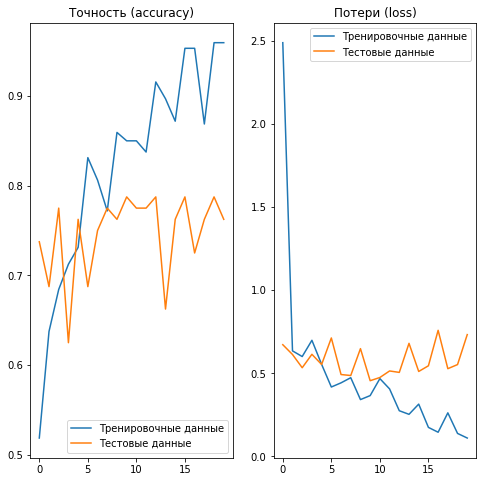

In [88]:
acc = history.history['accuracy']
test_acc = history.history['val_accuracy']


loss = history.history['loss']
test_loss = history.history['val_loss']


epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Тренировочные данные')
plt.plot(epochs_range, test_acc, label='Тестовые данные')
plt.legend(loc='lower right')
plt.title('Точность (accuracy)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Тренировочные данные')
plt.plot(epochs_range, test_loss, label='Тестовые данные')
plt.legend(loc='upper right')
plt.title('Потери (loss)')



plt.show()